## Глава 1.
### Разведывательный анализ данных.

##### Для вычисления среднего и медианы используем методы кадра данных пакета pandas
##### Для усеченного среднего значения используем функцию `tream_mean` из библиотеки `spcipy.stats`

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import numpy as np
import wquantiles
from statsmodels.robust.scale import mad

### *Пример: средние оценки численности населения и уровня убийств*

In [4]:
# считываем данные

state_df = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/01_state.csv')

In [5]:
state_df.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [6]:
state_df.shape

(50, 4)

In [7]:
# Вычисление среднего

state_df['Population'].mean()

np.float64(6162876.3)

In [ ]:
# Вычисление усеченного 
# proportiontocut=0.1 - отбрасывает по 10% с каждого конца  

trim_mean(state_df['Population'], proportiontocut=0.1)

np.float64(4783697.125)

In [11]:
# Вычисление медианы

state_df['Population'].median()

np.float64(4436369.5)

In [15]:
# Взвешенное среднее значение

np.average(state_df['Murder.Rate'], weights=state_df['Population'])

np.float64(4.445833981123393)

In [17]:
# Взвешенная медиана

wquantiles.median(state_df['Murder.Rate'], weights=state_df['Population'])

np.float64(4.4)

### *Пример: оценки вариабельности населения штатов*

In [18]:
# std - стандартное отклонение
state_df['Population'].std()

np.float64(6848235.347401142)

In [24]:
# IQR - Межквартильный размах
state_df['Population'].quantile(q=0.75) - state_df['Population'].quantile(q=0.25)

np.float64(4847308.0)

In [23]:
# MAD - робастая оценка медианного абсолютного отклонения
# Для нахождения MAD используем robust.scale.mad из библиотеки statsmodels

mad(state_df['Population'])
 

np.float64(3849876.1459979336)

In [26]:
state_df['Population'].quantile(q=[0.25, 0.50, 0.75])

0.25    1833004.25
0.50    4436369.50
0.75    6680312.25
Name: Population, dtype: float64

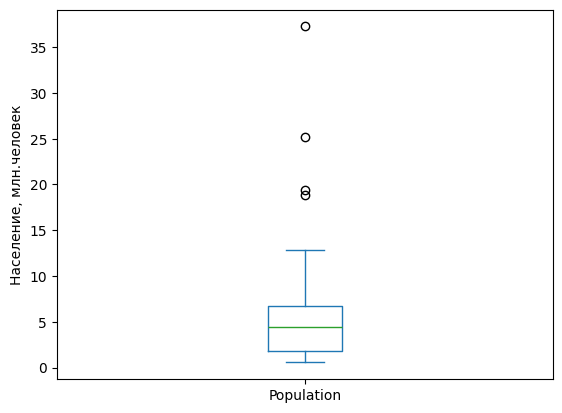

In [37]:
# Коробчатая диаграмма

ax = (state_df['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Население, млн.человек')

plt.show()

### Частотные таблицы и гистограммы
Наименее густонаселенный штат Вайоминг = 563_626 человек.
Наиболее густанаселенный штат - Калифорния = 37_253_956 человек.
Это дает размах 37_253_956 - 563_626 = 36_690_330, который делим на равные 10 корзин.
Каждая из 10 равноразмерных корзин будет иметь ширину = 3_669_033

In [41]:
'''
Функция pandas.cut создает серию, каоторая увязывает значения с сегментами.
Используя метод value_counts, мы получаем частотную таблицу
'''

binnedPopulation = pd.cut(x=state_df['Population'], bins=10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

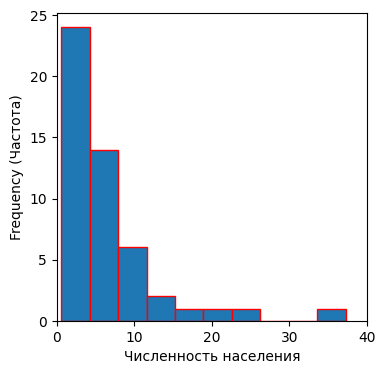

In [51]:
# Построение гистограммы

# bins=10 - число корзин
ax = (state_df['Population'] / 1_000_000).plot.hist(figsize=(4, 4),
                                                    bins=10,
                                                    edgecolor='red')

ax.set_xlabel('Численность населения')
ax.set_ylabel('Frequency (Частота)')
ax.set_xlim(0, 40)

plt.show()

### Графики и оценки плотности
Для построения плотностного графика используем метод density

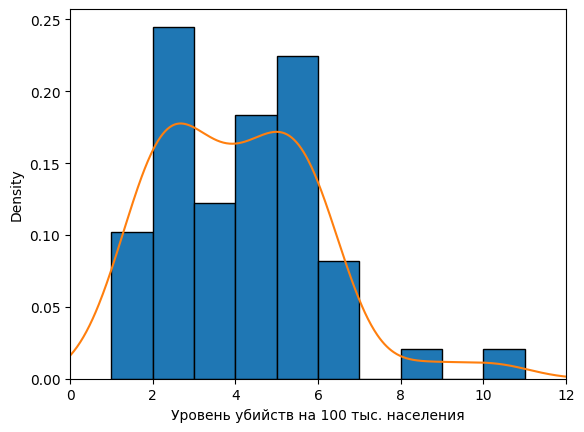

In [50]:
ax = state_df['Murder.Rate'].plot.hist(density=True,
                                       xlim=[0, 12],
                                       bins=range(1, 12),
                                       edgecolor='black')
state_df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Уровень убийств на 100 тыс. населения')


plt.show()

## Разведывание двоичных и категориальных данных

In [52]:
# Loading data

df_dfw_airlines = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/02_dfw_airline.csv')

In [53]:
df_dfw_airlines

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


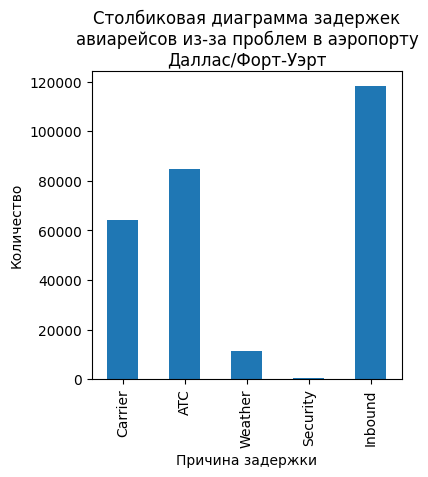

In [60]:
# Строим Столбиковую диаграму
'''ось Х - категории, ось У - частоты или доли'''

ax = df_dfw_airlines.transpose().plot.bar(figsize=(4, 4),
                                          legend=False)

# ax.set_title('Столбиковая диаграмма задержек авиарейсов\nиз-за проблем в аэропорту Даллас/Форт-Уэрт')
ax.set_title('Столбиковая диаграмма задержек авиарейсов из-за проблем в аэропорту Даллас/Форт-Уэрт', wrap=True)
ax.set_xlabel('Причина задержки')
ax.set_ylabel('Количество')

plt.show()

## КОРРЕЛЯЦИЯ

In [76]:
# Матрица корреляции в тепловой карте (heatmap) seaborn

sp500_sym = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/03_sp500_sectors.csv')

In [77]:
sp500_sym

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [83]:
sp500_px = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/03_sp500_data.csv.gz')

In [84]:
sp500_px.shape

(5647, 518)

In [88]:
sp500_px

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1,1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
2,1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
3,1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
4,1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
5643,2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
5644,2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
5645,2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [ ]:
sp500_px.iloc[:5, :5]

,Unnamed: 0,ADS,CA,MSFT,RHT
0,1993-01-29,0.0,0.060124,-0.022100,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0


In [89]:
# Преобразуем столбец в datetime и устанавливаем его в качестве индекса
sp500_px['Unnamed: 0'] = pd.to_datetime(sp500_px['Unnamed: 0'])
sp500_px.set_index('Unnamed: 0', inplace=True)

In [91]:
sp500_px.head(4)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0


<Axes: >

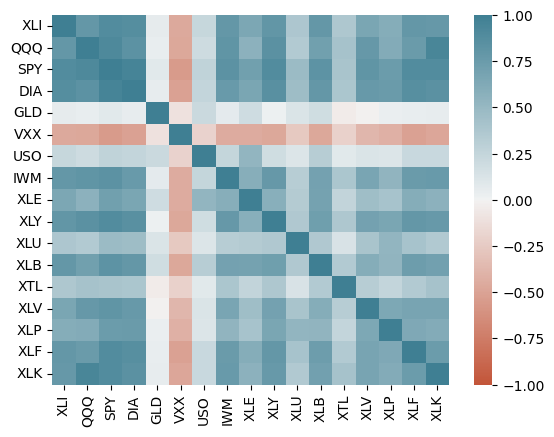

In [90]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))            

# plt.tight_layout()
# plt.show()


## Диаграммы рассеяния

In [102]:
sp500_sym.head(3)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT


In [ ]:
# Determine telecommunications symbols
# отсортировали по сектору telecommunications_services и взяли symbol и получили series
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [107]:
telecomSymbols.shape

(5,)

In [112]:
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

In [110]:
telecom

,T,CTL,FTR,VZ,LVLT
Unnamed: 0,,,,,
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000


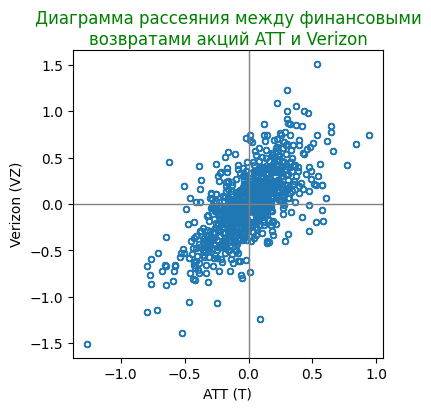

In [114]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')

ax.set_title('Диаграмма рассеяния между финансовыми возвратами акций ATT и Verizon', wrap=True, color='green')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.show()

## Разведывание двух и более переменных

### Сетка из шестиугольных корзин и контуры (сопоставление числовых данных с числовыми данными на графике)

In [38]:
kc_tax = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/04_kc_tax.csv.gz')

In [39]:
kc_tax.head(3)

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0


In [5]:
kc_tax.shape

(498249, 3)

In [6]:
# Фильтруем набор данных:
# 1. Исключаем очень дорогое жилье
# 2. Исключаем жилье очень малых или очень больших размеров

In [40]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750_000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


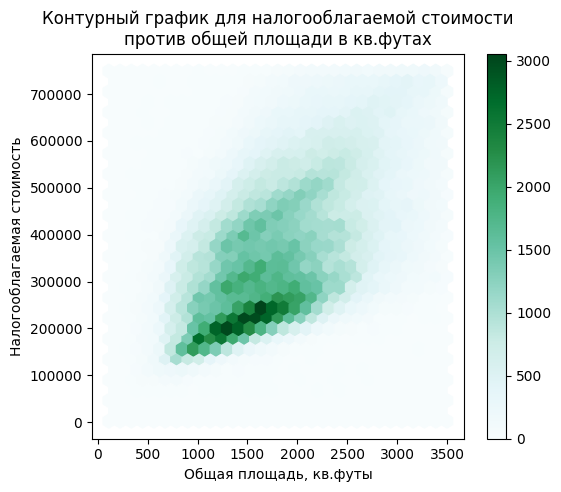

In [9]:
# pandas hexbin

ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(6, 5))

ax.set_title('Контурный график для налогооблагаемой стоимости\nпротив общей площади в кв.футах', )
ax.set_xlabel('Общая площадь, кв.футы')
ax.set_ylabel('Налогооблагаемая стоимость')

plt.show()

In [ ]:
# seaborn kdeplot
# '''СЛИШКОМ МНОГО ДАННЫХ - ДОЛГО ОТРИСОВЫВАЕТ'''
# fig, ax = plt.subplots(figsize=(10, 6))

# ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)

# ax.set_title('График с сеткой из шестиугольных корзин для налогооблагаемой стоимости\nпротив общей площади в кв.футах', )
# ax.set_xlabel('Общая площадь, кв.футы')
# ax.set_ylabel('Налогооблагаемая стоимость')

# plt.show()

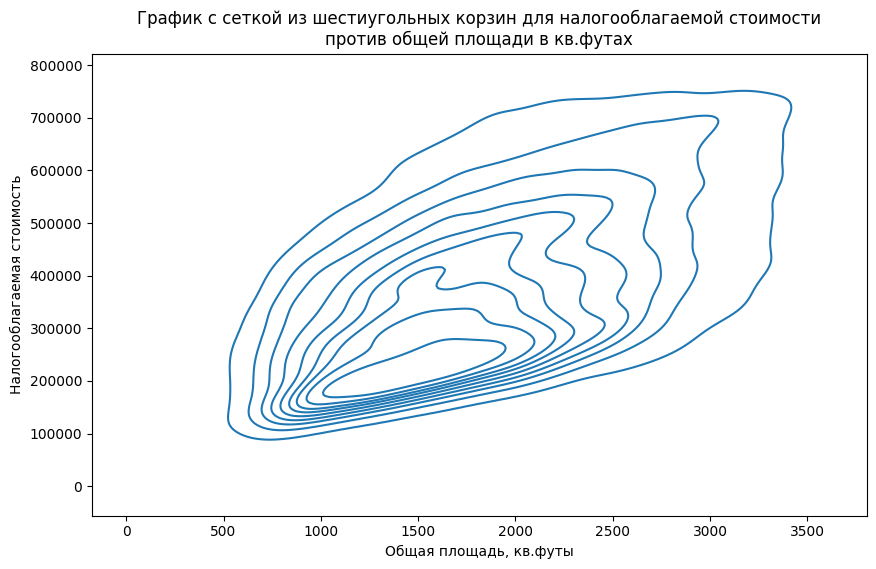

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

sample_data = kc_tax0.sample(n=50_000, random_state=42)  # Выборка из 50000 строк
ax = sns.kdeplot(data=sample_data, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)

ax.set_title('График с сеткой из шестиугольных корзин для налогооблагаемой стоимости\nпротив общей площади в кв.футах', )
ax.set_xlabel('Общая площадь, кв.футы')
ax.set_ylabel('Налогооблагаемая стоимость')

plt.show()


In [ ]:
# '''СЛИШКОМ МНОГО ДАННЫХ - ДОЛГО ОТРИСОВЫВАЕТ'''

# fig, ax = plt.subplots(figsize=(10, 6))

# ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax, bw_adjust=0.5)

# plt.show()

### Таблица сопряженности
#### Метод `pivot_table` - создает сводную таблицу. Аргумент `aggfunc` позволяет получить количества

In [9]:
# load data
lc_loans_df = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/05_lc_loans.csv')
lc_loans_df.head(10)

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
5,Fully Paid,A
6,Current,C
7,Fully Paid,E
8,Charged Off,F
9,Charged Off,B


In [5]:
lc_loans_df.shape

(450961, 2)

####  Код ниже:
* Создаёт сводную таблицу с использованием `pivot_table()`.
* `index='grade'` – строки индексируются по значению колонки grade.
* `columns='status'` – названия колонок соответствуют значениям из колонки status.
* `aggfunc=lambda x: len(x)` – в ячейки записывается количество строк (длина) для каждой комбинации `grade` и `status`.
* `margins=True` – добавляет строки и столбцы с общими итогами (аналог Итого в Excel).
Итоговые строки и столбцы помогут увидеть суммарное количество записей по каждому уровню grade и status.

#### Python len(x) действительно возвращает длину объекта, например, строки или списка. Но в pivot_table() это работает немного по-другому, потому что x — это не строка и не список, а группа строк DataFrame.

**Как это работает** в `pivot_table()`:
* `aggfunc=lambda x: len(x)` получает группу строк для каждой комбинации `grade` и `status`.
* Эта группа передаётся в виде `Series`, содержащей все строки, соответствующие данной комбинации.
* `len(x)` в этом случае считает количество элементов в этой группе.

In [6]:
crosstab = lc_loans_df.pivot_table(index='grade', columns='status',
                                   aggfunc=lambda x: len(x), margins=True)



In [7]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [17]:
lc_loans_df[(lc_loans_df['grade'] == 'G') & (lc_loans_df['status'] == 'Charged Off')]

,status,grade
601,Charged Off,G
1695,Charged Off,G
2451,Charged Off,G
2608,Charged Off,G
2754,Charged Off,G
...,...,...
444671,Charged Off,G
446617,Charged Off,G
448393,Charged Off,G
449817,Charged Off,G


In [21]:
# Создаем копию сводной таблицы, игнорируя столбцовые суммы

df = crosstab.loc['A':'G',:].copy()
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [25]:
df.loc[:,'Charged Off':'Late']

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,0.021548,0.690454,0.281528,0.006470
B,0.040054,0.709013,0.235401,0.015532
C,0.049828,0.735702,0.191495,0.022974
D,0.067410,0.717328,0.184189,0.031073
E,0.081657,0.707936,0.170929,0.039478
F,0.118258,0.654371,0.180409,0.046962
G,0.126196,0.614008,0.198396,0.061401


In [ ]:
# Делим строки на строчную сумму
'''
.div(df['All'], axis=0) – выполняет поэлементное деление каждого значения в выбранных столбцах на значение из столбца All в той же строке.
axis=0 – операции выполняются по строкам (вдоль столбцов). В данном случае, каждую ячейку строки делят на значение из столбца All в той же строке.
'''

df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)

/tmp/ipykernel_18058/3366889478.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0215478  0.04005439 0.04982834 0.06740983 0.08165728 0.1182579
 0.12619562]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
/tmp/ipykernel_18058/3366889478.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.69045386 0.70901262 0.73570217 0.71732838 0.70793587 0.65437074
 0.61400802]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
/tmp/ipykernel_18058/3366889478.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.28152849 0.23540

In [24]:
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


In [ ]:
'''
sum(df['All']) – считает общую сумму всех значений в столбце All.
df['All'] / sum(df['All']) – каждую ячейку в столбце All делят на эту общую сумму.
'''

df['All'] = df['All'] / sum(df['All'])

In [27]:
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [29]:
perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


### Категориальные и числовые данные

In [3]:
airline_stats_df = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/06_airline_stat.csv')

In [4]:
airline_stats_df.shape

(33468, 4)

In [5]:
airline_stats_df.head(3)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American


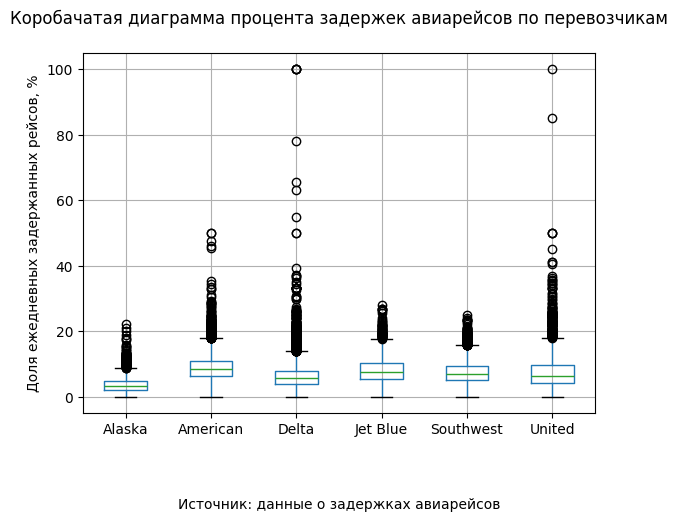

In [37]:
fig, ax = plt.subplots(1, 1) # Создаём фигуру и ось 

ax = airline_stats_df.boxplot(by='airline', column='pct_carrier_delay', ax=ax)

ax.set_xlabel('')
ax.set_ylabel('Доля ежедневных задержанных рейсов, %')
ax.set_title('Коробачатая диаграмма процента задержек авиарейсов по перевозчикам\n')
plt.suptitle('') # Убираем общий заголовок

# Добавляем подпись внизу графика
fig.text(0.5, -0.05, 'Источник: данные о задержках авиарейсов', ha='center', fontsize=10)
plt.show()

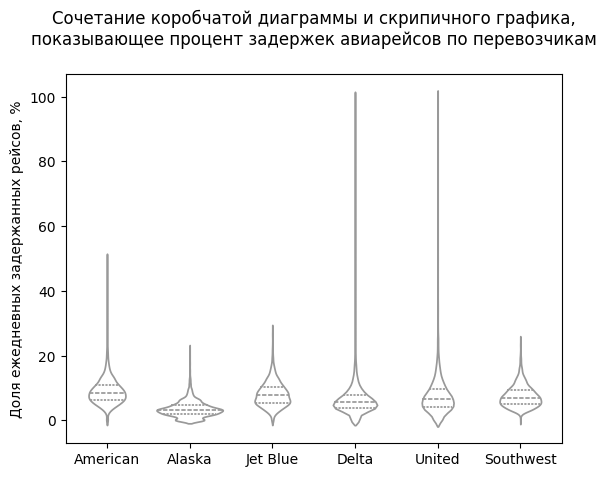

In [36]:
# Скрипичный график строим с помощью метода violinplot пакета seaborn
fig, ax = plt.subplots(1, 1)
ax = sns.violinplot(data=airline_stats_df, x='airline', y='pct_carrier_delay', inner='quart', color='white')

ax.set_xlabel('')
ax.set_ylabel('Доля ежедневных задержанных рейсов, %')
ax.set_title('Сочетание коробчатой диаграммы и скрипичного графика,\nпоказывающее процент задержек авиарейсов по перевозчикам\n')

plt.show()

## Визуализация многочисленных переменных
### Кондиционность - расширяемость на ьольшее число переменных.
Существует класстер домов (изучал раннее), которые имею более высокую налогооблагаемую стоимость в расчете на квадратный фут.
Ниже, будет объяснение данного эффекта, путем отображения данных набора почтовых индексов.
Например у почтовых индексов (98112, 98105) налогооблагаемая стоимлсть намного выше, чем у (98108, 98057)

In [41]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [ ]:
zip_codes: list = [98188, 98105, 98108, 98126]

# Выбираем только те строки, где присутствую коды из zip_codes
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


In [44]:
sns.light_palette

<function seaborn.palettes.light_palette(color, n_colors=6, reverse=False, as_cmap=False, input='rgb')>

### Код ниже создает гексагональную (hexbin) диаграмму, показывающую зависимость между общей жилой площадью (SqFtTotLiving) и налогооблагаемой стоимостью (TaxAssessedValue) для разных почтовых индексов (ZipCode) в наборе данных kc_tax_zip.

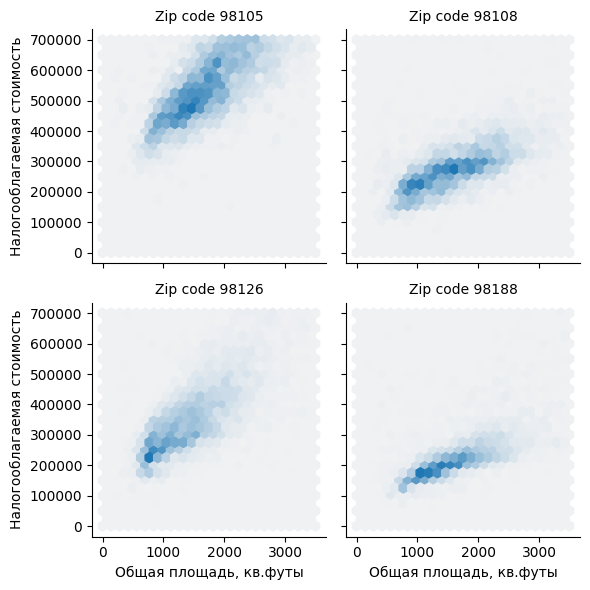

In [59]:
'''Функция hexbin
Создает цветовую палитру (cmap) на основе переданного цвета.
Строит hexbin-график, который разбивает пространство на шестиугольные ячейки и окрашивает их в зависимости от плотности точек.
gridsize=25 означает, что поле делится на 25 ячеек вдоль осей X и Y.
as_cmap=True указывает, что создаваемая цветовая палитра должна быть в формате цветовой карты (colormap, cmap), а не списком отдельных цветов.'''
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color=color, as_cmap=True)
    plt.hexbin(x=x, y=y, gridsize=25, cmap=cmap, **kwargs)

'''Разделяет данные по ZipCode и создает отдельный график для каждого значения ZipCode.
col_wrap=2 делает так, чтобы графики располагались в 2 колонки.'''
g = sns.FacetGrid(data=kc_tax_zip, col='ZipCode', col_wrap=2)
'''Отрисовка hexbin для каждого ZipCode
- hexbin (передается как объект функции, без вызова (), потому что map() сам вызовет ее нужное количество раз, передавая соответствующие данные.)
для каждого ZipCode, используя SqFtTotLiving (X) и TaxAssessedValue (Y).
- extent=[0, 3500, 0, 700_000] задает пределы осей.'''
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700_000])

g.set_axis_labels('Общая площадь, кв.футы', 'Налогооблагаемая стоимость')
'''Заголовок каждого графика будет Zip code 98108 (или другой индекс, если в данных есть другие Zip-коды).'''
g.set_titles('Zip code {col_name:.0f}')

plt.show()